In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

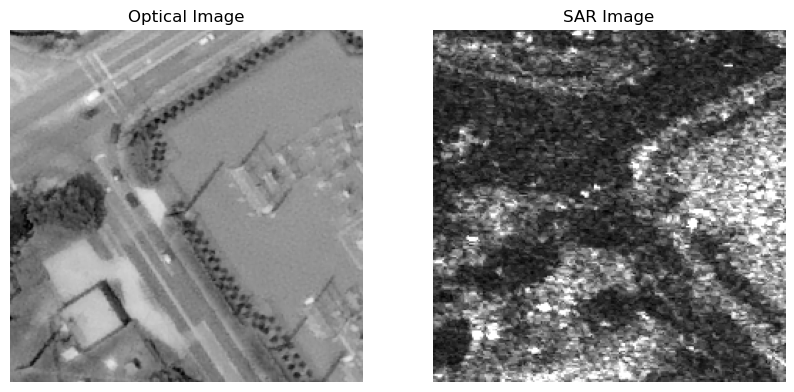

In [2]:
# Load the images
img1 = cv2.imread('./output_png_images/image_opt_35.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('./output_png_images_sar/image_sar_35.png', cv2.IMREAD_GRAYSCALE)

# Check if the images were loaded successfully
if img1 is None or img2 is None:
    print("Error: Could not load images.")
else:
    # Display the images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.title('Optical Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.title('SAR Image')
    plt.axis('off')

    plt.show()

In [3]:
# Initialize SIFT detector
#SIFT (Scale-Invariant Feature Transform) detector, which is a keypoint detector and a descriptor extractor.
sift = cv2.SIFT_create()

# Detect key points and compute descriptors
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

In [4]:
# Initialize the Brute-Force Matcher
bf = cv2.BFMatcher()

# Match descriptors
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

In [5]:
# Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

In [6]:
# Draw matches
matching_result = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

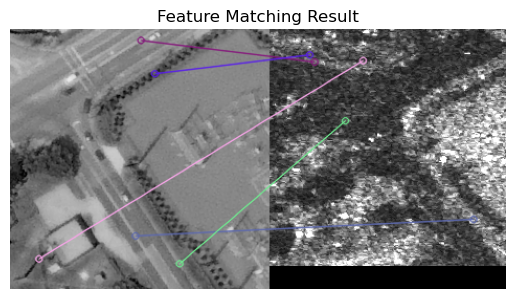

In [7]:
# Display the matching result using matplotlib
plt.imshow(cv2.cvtColor(matching_result, cv2.COLOR_BGR2RGB))
plt.title("Feature Matching Result")
plt.axis('off')
plt.show()

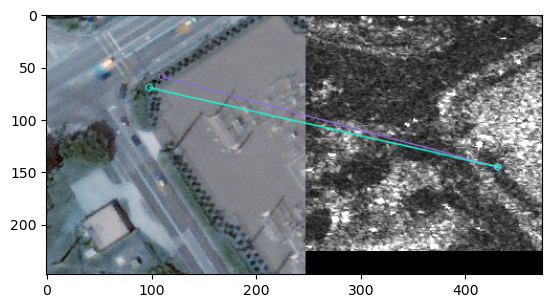

In [8]:
im1 = cv2.imread('C:/Users/MKhan/Desktop/06.09.2023/output_png_images/image_opt_35.png')
im2 = cv2.imread('C:/Users/MKhan/Desktop/06.09.2023/output_png_images_sar/image_sar_35.png')
gray1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

# initialize the AKAZE descriptor, then detect keypoints and extract
# local invariant descriptors from the image
detector = cv2.AKAZE_create()
(kps1, descs1) = detector.detectAndCompute(gray1, None)
(kps2, descs2) = detector.detectAndCompute(gray2, None)

# Match the features
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = bf.knnMatch(descs1, descs2, k=2)  

# Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw matches
img_matches = cv2.drawMatches(im1, kps1, im2, kps2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the result
plt.imshow(img_matches)
plt.show()

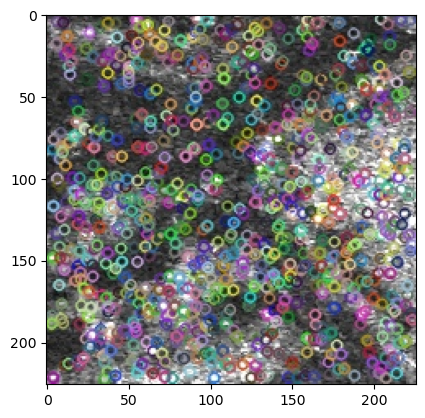

In [9]:
img = cv2.imread('C:/Users/MKhan/Desktop/06.09.2023/output_png_images_sar/image_sar_35.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Use SIFT from opencv-contrib-python
sift = cv2.SIFT_create()
kp = sift.detect(gray, None)

img_with_keypoints = cv2.drawKeypoints(gray, kp, None)

cv2.imwrite('sift_keypoints.jpg', img_with_keypoints)

# Display the image using matplotlib
img_display = cv2.imread('sift_keypoints.jpg')
plt.imshow(cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB))
plt.show()


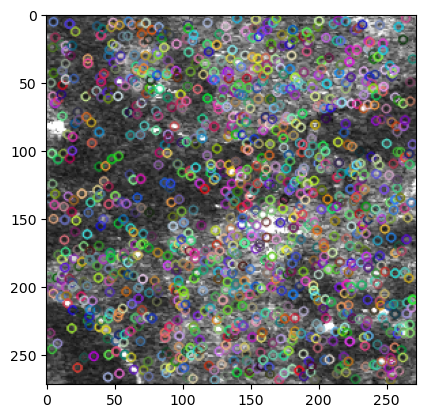

In [10]:
from tifffile import imread

# Load the TIFF image
img = imread('C:/Users/MKhan/Desktop/06.09.2023/output_tiff_images_sar/image_sar_33.tif')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Use SIFT from opencv-contrib-python
sift = cv2.SIFT_create()
kp = sift.detect(gray, None)

img_with_keypoints = cv2.drawKeypoints(gray, kp, None)

# Save the image with keypoints
cv2.imwrite('sift_keypoints.tif', img_with_keypoints)

# Display the image using matplotlib
img_display = cv2.imread('sift_keypoints.tif')
plt.imshow(cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB))
plt.show()